In [1]:
import pandas as pd
import numpy as np

### Handling Missing Data

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [3]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [4]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [5]:
df.dropna(axis = 1)

,C
0,1
1,2
2,3


In [6]:
df.dropna(thresh = 2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [7]:
df.fillna(value = df['A'].mean())

,A,B,C
0,1.0,5.0,1
1,2.0,1.5,2
2,1.5,1.5,3


In [8]:
df['A'].fillna(value = df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Group By

In [10]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200, 120, 340, 124, 243, 350]}

In [11]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [12]:
df.groupby('Company')

In [13]:
by_comp = df.groupby('Company')

In [14]:
by_comp.sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [15]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [16]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [17]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [18]:
df.groupby('Company').sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [19]:
df.groupby('Person').max()

,Company,Sales
Person,,
Amy,MSFT,340
Carl,FB,243
Charlie,GOOG,120
Sam,GOOG,200
Sarah,FB,350
Vanessa,MSFT,124


In [20]:
df.groupby('Person').min()

,Company,Sales
Person,,
Amy,MSFT,340
Carl,FB,243
Charlie,GOOG,120
Sam,GOOG,200
Sarah,FB,350
Vanessa,MSFT,124


In [22]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [23]:
type(by_comp.describe().transpose())

pandas.core.frame.DataFrame

In [24]:
by_comp.describe().transpose()['MSFT']

Sales  count      2.000000
       mean     232.000000
       std      152.735065
       min      124.000000
       25%      178.000000
       50%      232.000000
       75%      286.000000
       max      340.000000
Name: MSFT, dtype: float64

### Merging, Joining and Concatenation

In [25]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [26]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [27]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [28]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### Concatenation

In [29]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [30]:
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merging

In [31]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [32]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [33]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [35]:
pd.merge(left, right, on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [36]:
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key2': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [37]:
left

,key1,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [38]:
right

,key2,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [40]:
pd.merge(left, right, left_on = 'key1', right_on = 'key2')

,key1,A,B,key2,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K2,C2,D2
3,K3,A3,B3,K3,C3,D3


In [41]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [42]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [43]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [45]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [46]:
pd.merge(left, right, on = 'key2')

,key1_x,key2,A,B,key1_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K0,A0,B0,K1,C1,D1
2,K0,K0,A0,B0,K1,C2,D2
3,K0,K0,A0,B0,K2,C3,D3
4,K1,K0,A2,B2,K0,C0,D0
5,K1,K0,A2,B2,K1,C1,D1
6,K1,K0,A2,B2,K1,C2,D2
7,K1,K0,A2,B2,K2,C3,D3


In [47]:
pd.merge(left, right, on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [48]:
# left join

pd.merge(left, right, how = 'left', on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [49]:
pd.merge(left, right, how = 'right', on = ['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


### Join

In [52]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [53]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [54]:
right.join(left)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [55]:
left.join(right, how = 'outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Pandas Operations

In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [60]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [61]:
df['col2'].nunique()

3

In [63]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [64]:
# selection

df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [67]:
df[(df['col1'] > 2) & (df['col2'] == 444)]

,col1,col2,col3
3,4,444,xyz


In [68]:
df[(df['col1'] > 2) & (df['col2'] != 444)]

,col1,col2,col3
2,3,666,ghi


In [69]:
df['col2'] * 2

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [70]:
df['col2'] *= 2

In [71]:
df

,col1,col2,col3
0,1,888,abc
1,2,1110,def
2,3,1332,ghi
3,4,888,xyz


In [72]:
def times2(x):
    return x * 2

In [73]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [74]:
# delete a column

del df['col1']

In [75]:
df

,col2,col3
0,888,abc
1,1110,def
2,1332,ghi
3,888,xyz


In [78]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [80]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [81]:
df.sort_values(by = 'col2')

,col2,col3
0,888,abc
3,888,xyz
1,1110,def
2,1332,ghi


In [82]:
df.sort_values(by = 'col2', ascending=True)

,col2,col3
0,888,abc
3,888,xyz
1,1110,def
2,1332,ghi


In [83]:
df.sort_values(by = 'col2', ascending=False)

,col2,col3
2,1332,ghi
1,1110,def
0,888,abc
3,888,xyz


In [84]:
# check for null values

df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [85]:
len(df)

4

In [87]:
df.shape

(4, 2)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col2    4 non-null      int64 
 1   col3    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [91]:
df.head()

,col2,col3
0,888,abc
1,1110,def
2,1332,ghi
3,888,xyz


In [93]:
pd.read_excel('Excel_Sample.xlsx')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [94]:
df = pd.read_excel('Excel_Sample.xlsx')
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [95]:
df = pd.read_excel('Excel_Sample.xlsx', index_col=0)
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [98]:
df.to_excel('example.xlsx', index=False)

In [101]:
df.to_csv('example_csv.csv', index=False)

In [103]:
df = pd.read_csv('C:\\Users\\eokon\\Documents\\DAO\\Data_Science_Utiva\\example_csv.csv')

In [104]:
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### Matplotlib

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline  

#plt.show()

In [110]:
x = np.linspace(0, 5, 11)
y = x ** 2

In [111]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [112]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

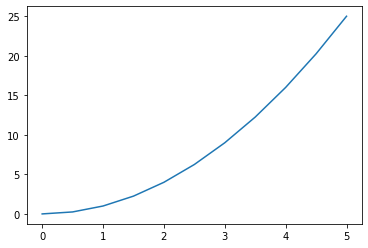

In [113]:
plt.plot(x, y)

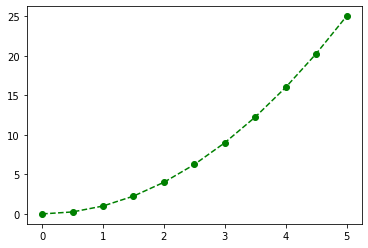

In [115]:
plt.plot(x, y, 'go--')

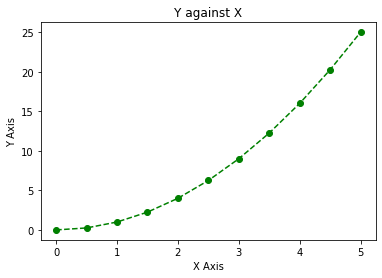

In [117]:
plt.plot(x, y, 'go--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Y against X')
plt.show()

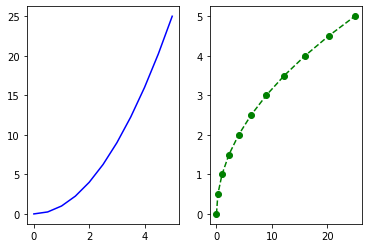

In [129]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'go--')
plt.show()

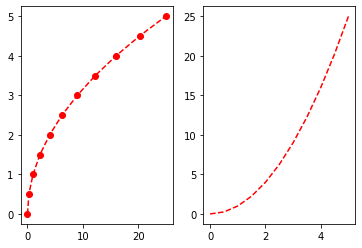

In [132]:
plt.subplot(1, 2, 2)
plt.plot(x, y, 'r--')

plt.subplot(1, 2, 1)
plt.plot(y, x, 'ro--')

In [137]:
fig = plt.figure()
fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

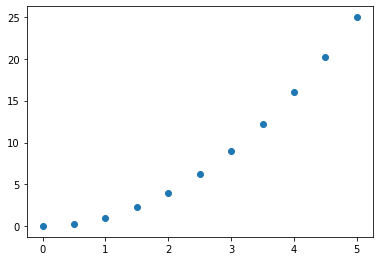

In [135]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'o')

Text(0.5, 1.0, 'Title')

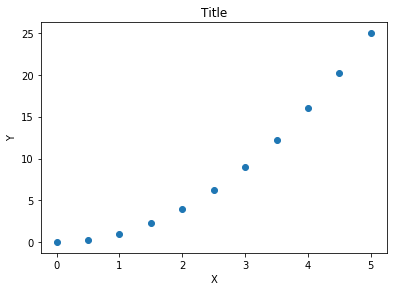

In [136]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'o')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_title('Title')

Text(0.5, 1.0, 'Axes 2 Title')

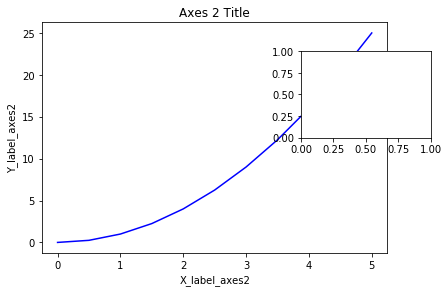

In [138]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.7, 0.5, 0.3, 0.3]) # inset axes  # left, bottom, width, height (range 0 to 1)

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

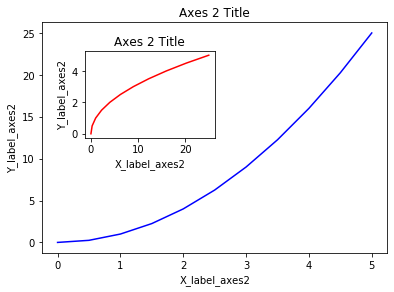

In [152]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.3, 0.3]) # inset axes  # left, bottom, width, height (range 0 to 1)

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F23FF70CC8>,
       dtype=object))

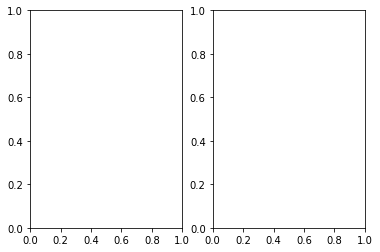

In [142]:
#subplots

plt.subplots(1, 2)

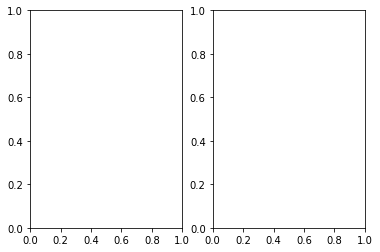

In [143]:
fig, axes = plt.subplots(1, 2)

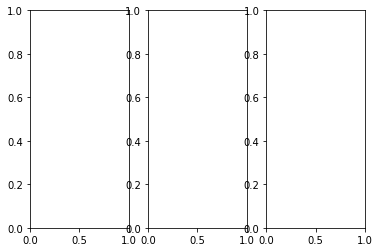

In [144]:
fig, axes = plt.subplots(1, 3)

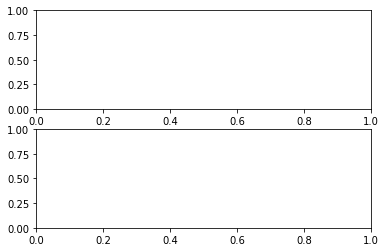

In [146]:
fig, axes = plt.subplots(2, 1)

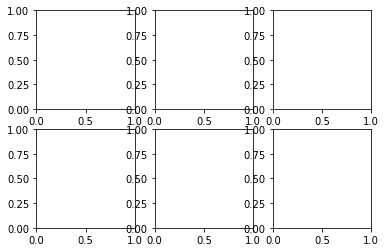

In [148]:
fig, axes = plt.subplots(2, 3)

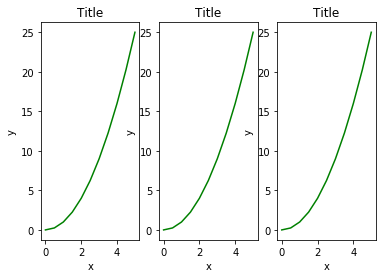

In [156]:
fig, axes = plt.subplots(1, 3)

for ax in axes:
    ax.plot(x,y,'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')
    

In [157]:
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

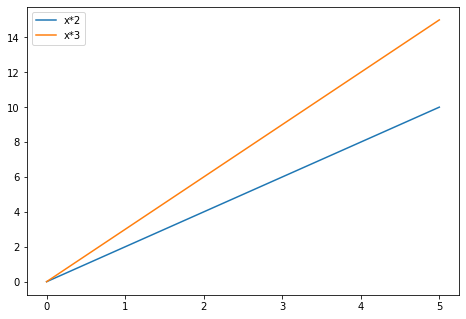

In [158]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x*2, label="x*2")
ax.plot(x, x*3, label="x*3")
ax.legend()

Text(0.5, 1.0, 'custom axes range')

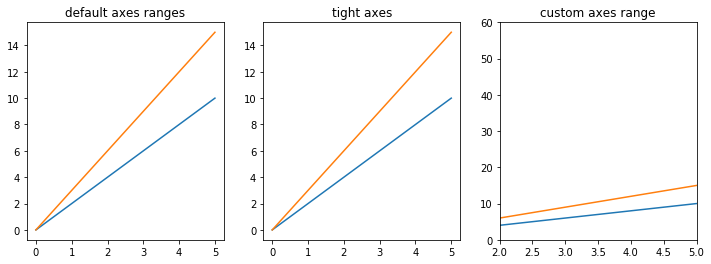

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x*2, x, x*3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x*2, x, x*3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x*2, x, x*3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range")

Text(0.5, 1.0, 'custom axes range')

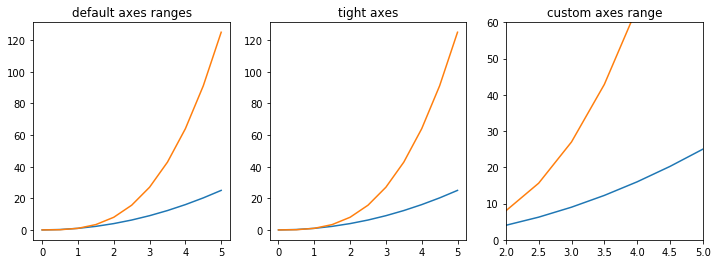

In [160]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range")

(array([12.,  7.,  8., 12., 11.,  8., 11.,  8., 10., 13.]),
 array([  3. , 102.2, 201.4, 300.6, 399.8, 499. , 598.2, 697.4, 796.6,
        895.8, 995. ]),
 <a list of 10 Patch objects>)

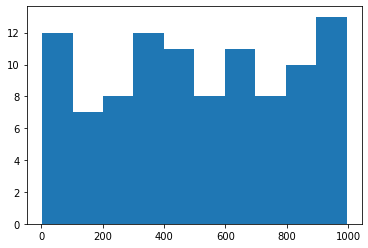

In [161]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

In [162]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

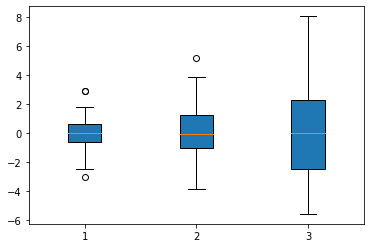

In [164]:
plt.boxplot(data, patch_artist=True)
plt.show()

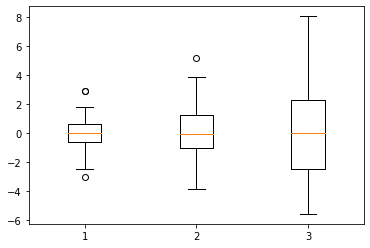

In [165]:
plt.boxplot(data)
plt.show()

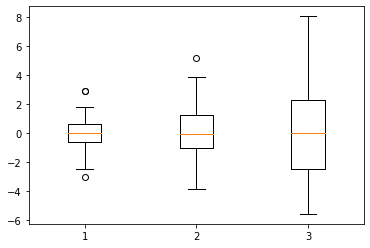

In [166]:
plt.boxplot(data, patch_artist=False)
plt.show()